## 1.快速开始
### 1.1 生成对象

In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
dates = pd.date_range('20200420', periods=6)
dates

DatetimeIndex(['2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-04-20,0.390576,-1.318489,1.248733,0.408517
2020-04-21,-0.214388,-1.123221,0.244294,0.212457
2020-04-22,1.405792,1.499307,1.183477,0.329262
2020-04-23,-0.783093,1.035129,0.642869,-0.156191
2020-04-24,-0.311120,-0.364519,-0.143694,1.673797
2020-04-25,-1.521797,-0.715293,-2.330098,-0.405661


In [5]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20200420'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3]*4, dtype='float32'),
    'E': pd.Categorical(["test1", "test2", "test3", "test4"]),
    'F': 'foo'
})
df2
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D           float32
E          category
F            object
dtype: object

In [6]:
df.describe()  # 查看数据统计摘要

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.172338,-0.164514,0.140930,0.343697
std,1.002243,1.166326,1.323914,0.721419
min,-1.521797,-1.318489,-2.330098,-0.405661
25%,-0.665100,-1.021239,-0.046697,-0.064029
50%,-0.262754,-0.539906,0.443581,0.270860
75%,0.239335,0.685217,1.048325,0.388704
max,1.405792,1.499307,1.248733,1.673797


In [7]:
df.T  # 数据转置

,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25
A,0.390576,-0.214388,1.405792,-0.783093,-0.311120,-1.521797
B,-1.318489,-1.123221,1.499307,1.035129,-0.364519,-0.715293
C,1.248733,0.244294,1.183477,0.642869,-0.143694,-2.330098
D,0.408517,0.212457,0.329262,-0.156191,1.673797,-0.405661


In [8]:
df.sort_index(axis=1, ascending=False)  # 0代表纵轴 1代表横轴，assending 代表升序

,D,C,B,A
2020-04-20,0.408517,1.248733,-1.318489,0.390576
2020-04-21,0.212457,0.244294,-1.123221,-0.214388
2020-04-22,0.329262,1.183477,1.499307,1.405792
2020-04-23,-0.156191,0.642869,1.035129,-0.783093
2020-04-24,1.673797,-0.143694,-0.364519,-0.311120
2020-04-25,-0.405661,-2.330098,-0.715293,-1.521797


In [9]:
df.sort_values(by='B')  # 对按B列的数据进行排序

,A,B,C,D
2020-04-20,0.390576,-1.318489,1.248733,0.408517
2020-04-21,-0.214388,-1.123221,0.244294,0.212457
2020-04-25,-1.521797,-0.715293,-2.330098,-0.405661
2020-04-24,-0.311120,-0.364519,-0.143694,1.673797
2020-04-23,-0.783093,1.035129,0.642869,-0.156191
2020-04-22,1.405792,1.499307,1.183477,0.329262


In [10]:
# 访问数据
df.A == df['A']

2020-04-20    True
2020-04-21    True
2020-04-22    True
2020-04-23    True
2020-04-24    True
2020-04-25    True
Freq: D, Name: A, dtype: bool

In [11]:
# 切片
df[0:3]

,A,B,C,D
2020-04-20,0.390576,-1.318489,1.248733,0.408517
2020-04-21,-0.214388,-1.123221,0.244294,0.212457
2020-04-22,1.405792,1.499307,1.183477,0.329262


In [12]:
df.loc[dates[0]]

A    0.390576
B   -1.318489
C    1.248733
D    0.408517
Name: 2020-04-20 00:00:00, dtype: float64

In [13]:
df.loc['20200420':'20200422','A':'C']  # 可以传入多个参数， 分别代表行和列，求种列支持切片、单个、传入列表，行支持单个、切片

,A,B,C
2020-04-20,0.390576,-1.318489,1.248733
2020-04-21,-0.214388,-1.123221,0.244294
2020-04-22,1.405792,1.499307,1.183477


In [14]:
# 按位置取值
df.iloc[3, 0]
df.iloc[1:3, 2:4]
df.iloc[[0, 1], [1, 2]]
# 获取值支持类似python或者numpy的切片

,B,C
2020-04-20,-1.318489,1.248733
2020-04-21,-1.123221,0.244294


In [15]:
# 快速访问标量指定值
df.iat[1, 2]

0.24429424255210244

In [16]:
# 布尔索引
df[df.A > 0]  # 获取A列大于0的所有行

,A,B,C,D
2020-04-20,0.390576,-1.318489,1.248733,0.408517
2020-04-22,1.405792,1.499307,1.183477,0.329262


In [17]:
df[df > 0] # 获取dataframe里所有大于0的数据

,A,B,C,D
2020-04-20,0.390576,NaN,1.248733,0.408517
2020-04-21,NaN,NaN,0.244294,0.212457
2020-04-22,1.405792,1.499307,1.183477,0.329262
2020-04-23,NaN,1.035129,0.642869,NaN
2020-04-24,NaN,NaN,NaN,1.673797
2020-04-25,NaN,NaN,NaN,NaN


In [18]:
# isin()筛选
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2[df2['E'].isin(["one"])]

,A,B,C,D,E
2020-04-20,0.390576,-1.318489,1.248733,0.408517,one
2020-04-21,-0.214388,-1.123221,0.244294,0.212457,one


### 1.2赋值

In [19]:
# 索引自动对齐新增序列
s1 = pd.Series([i for i in range(1, 7)], index=pd.date_range('20200420', periods=6))
s1

2020-04-20    1
2020-04-21    2
2020-04-22    3
2020-04-23    4
2020-04-24    5
2020-04-25    6
Freq: D, dtype: int64

In [20]:
df['F'] = s1
# 按标签赋值
df

,A,B,C,D,F
2020-04-20,0.390576,-1.318489,1.248733,0.408517,1
2020-04-21,-0.214388,-1.123221,0.244294,0.212457,2
2020-04-22,1.405792,1.499307,1.183477,0.329262,3
2020-04-23,-0.783093,1.035129,0.642869,-0.156191,4
2020-04-24,-0.311120,-0.364519,-0.143694,1.673797,5
2020-04-25,-1.521797,-0.715293,-2.330098,-0.405661,6


In [21]:
# 按标签值赋值
df.at[dates[0], 'A'] = 0
# 按位置赋值
df.iat[0, 1 ] = 0
df

,A,B,C,D,F
2020-04-20,0.000000,0.000000,1.248733,0.408517,1
2020-04-21,-0.214388,-1.123221,0.244294,0.212457,2
2020-04-22,1.405792,1.499307,1.183477,0.329262,3
2020-04-23,-0.783093,1.035129,0.642869,-0.156191,4
2020-04-24,-0.311120,-0.364519,-0.143694,1.673797,5
2020-04-25,-1.521797,-0.715293,-2.330098,-0.405661,6


In [22]:
# 按numpy数组赋值
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2020-04-20,0.000000,0.000000,1.248733,5,1
2020-04-21,-0.214388,-1.123221,0.244294,5,2
2020-04-22,1.405792,1.499307,1.183477,5,3
2020-04-23,-0.783093,1.035129,0.642869,5,4
2020-04-24,-0.311120,-0.364519,-0.143694,5,5
2020-04-25,-1.521797,-0.715293,-2.330098,5,6


In [23]:
# bool条件赋值
df2 = df.copy()
# 所有大于0的都转化为负数
df2[df2>0] = -df2
df2

,A,B,C,D,F
2020-04-20,0.000000,0.000000,-1.248733,-5,-1
2020-04-21,-0.214388,-1.123221,-0.244294,-5,-2
2020-04-22,-1.405792,-1.499307,-1.183477,-5,-3
2020-04-23,-0.783093,-1.035129,-0.642869,-5,-4
2020-04-24,-0.311120,-0.364519,-0.143694,-5,-5
2020-04-25,-1.521797,-0.715293,-2.330098,-5,-6


### 1.3缺失值


In [24]:
# pandas使用np.nan表示缺失数据

In [25]:
# 重建索引可以更改、添加、删除指定轴的索引，并返回数据副本
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1  # 第0，1行第E列的值设为1
df1

,A,B,C,D,F,E
2020-04-20,0.000000,0.000000,1.248733,5,1,1.0
2020-04-21,-0.214388,-1.123221,0.244294,5,2,1.0
2020-04-22,1.405792,1.499307,1.183477,5,3,NaN
2020-04-23,-0.783093,1.035129,0.642869,5,4,NaN


In [26]:
# 删除所有含缺失值的行 返回删除后的数据 不修改原始数据
df1.dropna(how='any')

,A,B,C,D,F,E
2020-04-20,0.000000,0.000000,1.248733,5,1,1.0
2020-04-21,-0.214388,-1.123221,0.244294,5,2,1.0


In [27]:
# 填充缺失值  返回新的数据 不修改原始数据
df1.fillna(value=10)

,A,B,C,D,F,E
2020-04-20,0.000000,0.000000,1.248733,5,1,1.0
2020-04-21,-0.214388,-1.123221,0.244294,5,2,1.0
2020-04-22,1.405792,1.499307,1.183477,5,3,10.0
2020-04-23,-0.783093,1.035129,0.642869,5,4,10.0


### 1.4 统计函数

In [28]:
# 平均值 计算时排除缺失值
df.mean() 

A   -0.237434
B    0.055234
C    0.140930
D    5.000000
F    3.500000
dtype: float64

In [29]:
# 在另一轴上求平均值
df.mean(1)

2020-04-20    1.449747
2020-04-21    1.181337
2020-04-22    2.417715
2020-04-23    1.978981
2020-04-24    1.836133
2020-04-25    1.286563
Freq: D, dtype: float64

In [30]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2020-04-20    NaN
2020-04-21    NaN
2020-04-22    1.0
2020-04-23    3.0
2020-04-24    5.0
2020-04-25    NaN
Freq: D, dtype: float64

In [31]:
df

,A,B,C,D,F
2020-04-20,0.000000,0.000000,1.248733,5,1
2020-04-21,-0.214388,-1.123221,0.244294,5,2
2020-04-22,1.405792,1.499307,1.183477,5,3
2020-04-23,-0.783093,1.035129,0.642869,5,4
2020-04-24,-0.311120,-0.364519,-0.143694,5,5
2020-04-25,-1.521797,-0.715293,-2.330098,5,6


In [32]:
df.sub(s, axis='index')  # 每一行分别减去s中每个数  空值运算则为空值 返回运算后的数据

,A,B,C,D,F
2020-04-20,NaN,NaN,NaN,NaN,NaN
2020-04-21,NaN,NaN,NaN,NaN,NaN
2020-04-22,0.405792,0.499307,0.183477,4.0,2.0
2020-04-23,-3.783093,-1.964871,-2.357131,2.0,1.0
2020-04-24,-5.311120,-5.364519,-5.143694,0.0,0.0
2020-04-25,NaN,NaN,NaN,NaN,NaN


In [33]:
df

,A,B,C,D,F
2020-04-20,0.000000,0.000000,1.248733,5,1
2020-04-21,-0.214388,-1.123221,0.244294,5,2
2020-04-22,1.405792,1.499307,1.183477,5,3
2020-04-23,-0.783093,1.035129,0.642869,5,4
2020-04-24,-0.311120,-0.364519,-0.143694,5,5
2020-04-25,-1.521797,-0.715293,-2.330098,5,6


In [34]:
# apply函数
df.apply(lambda x: x.max()-x.min())  #  对每一列进行处理 x代表是每一个colmun

A    2.927588
B    2.622528
C    3.578831
D    0.000000
F    5.000000
dtype: float64

In [35]:
#  直方图
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

2    3
5    2
1    2
4    1
3    1
0    1
dtype: int64

In [36]:
# 字符串方法
#  Series的str属性提供字符串处理功能， 模式匹配默认使用正则
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 1.5合并(Merge)

In [37]:
# 结合(Concat) y用于连接pandas对象 垂直方向的拼接
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.688580,-1.235322,-0.860470,-1.380961
1,-0.116117,-0.809427,-0.044115,-2.820211
2,-0.795287,-0.637428,0.675598,-0.692658
3,-0.517588,0.892453,-0.711225,0.184329
4,-0.841199,0.261658,0.575462,0.013840
5,1.857357,-2.540101,-1.048514,-0.940899
6,0.036939,0.067096,-0.495647,0.361383
7,-0.130648,-0.946594,0.268292,-1.086308
8,1.164341,0.070655,0.322943,-0.382519
9,-0.074333,-0.542776,-0.942938,1.154226


In [38]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.688580,-1.235322,-0.860470,-1.380961
1,-0.116117,-0.809427,-0.044115,-2.820211
2,-0.795287,-0.637428,0.675598,-0.692658
3,-0.517588,0.892453,-0.711225,0.184329
4,-0.841199,0.261658,0.575462,0.013840
5,1.857357,-2.540101,-1.048514,-0.940899
6,0.036939,0.067096,-0.495647,0.361383
7,-0.130648,-0.946594,0.268292,-1.086308
8,1.164341,0.070655,0.322943,-0.382519
9,-0.074333,-0.542776,-0.942938,1.154226


In [39]:
# 连接(join) sql风格的合并
left = pd.DataFrame({"key":['foo','foo'], 'lval':[1,2]})
right = pd.DataFrame({"key":['foo','foo'], 'rval':[3,4]})
left,right

(   key  lval
 0  foo     1
 1  foo     2,
    key  rval
 0  foo     3
 1  foo     4)

In [40]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,3
1,foo,1,4
2,foo,2,3
3,foo,2,4


In [41]:
# 追加(Append) 为dataframe追加行
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.122409,-0.252695,0.384004,0.350772
1,0.149145,0.818234,0.348171,-1.038246
2,0.751381,-1.050192,-0.815194,0.199433
3,0.098489,0.234244,0.457084,0.463744
4,0.390406,-0.465466,-0.926858,0.609101
5,-0.347820,0.076058,0.546726,0.779812
6,-0.628569,0.757047,0.703383,-0.440785
7,2.873760,1.565427,0.765279,-2.888163


In [42]:
s = pd.Series([1, 2, 3, 4], index=['A', 'B', 'C', 'D'])

In [43]:
s = df.iloc[3]
s

A    0.098489
B    0.234244
C    0.457084
D    0.463744
Name: 3, dtype: float64

In [44]:
# 分组(Grouping)
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,0.890810,-1.048230
1,bar,one,1.347735,0.331294
2,foo,two,0.362750,0.812227
3,bar,three,2.172326,0.868869
4,foo,two,-1.184046,0.514332
5,bar,two,-0.131565,-0.456452
6,foo,one,-1.122647,-2.272871
7,foo,three,-1.507137,1.995271


In [45]:
df.groupby('A').sum()  # 按A列的数据进行分组，每组求和 df.loc[1, 'C'] + df.loc[3, 'C'] + df.loc[5, 'C']

,C,D
A,,
bar,3.388496,0.743711
foo,-2.560271,0.000729


In [46]:
df.groupby(['A', 'B']).sum() # 按照A、B列进行分组，即A、B都相同为一组

C         D
A   B                        
bar one    1.347735  0.331294
    three  2.172326  0.868869
    two   -0.131565 -0.456452
foo one   -0.231837 -3.321101
    three -1.507137  1.995271
    two   -0.821296  1.326559

In [47]:
# 重塑(Reshaping)
# 堆叠(Stack)
tuples = list(zip(*[
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df2 = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2

A         B
first second                    
bar   one     0.089847  0.054082
      two    -1.865402  1.481105
baz   one     1.121612  1.573088
      two    -0.350771  0.781360
foo   one    -0.240698  1.498901
      two    -1.083972 -0.098096
qux   one    -0.305714 -0.483435
      two    -0.368887 -1.848996

In [48]:
stacked = df2.stack()  # stack将dataframe压缩到一个维度 将列也变为索引
stacked

first  second   
bar    one     A    0.089847
               B    0.054082
       two     A   -1.865402
               B    1.481105
baz    one     A    1.121612
               B    1.573088
       two     A   -0.350771
               B    0.781360
foo    one     A   -0.240698
               B    1.498901
       two     A   -1.083972
               B   -0.098096
qux    one     A   -0.305714
               B   -0.483435
       two     A   -0.368887
               B   -1.848996
dtype: float64

In [49]:
stacked.unstack(2)  # 按指定的索引解栈，默认折叠最后一层，可以指定为任何一层

A         B
first second                    
bar   one     0.089847  0.054082
      two    -1.865402  1.481105
baz   one     1.121612  1.573088
      two    -0.350771  0.781360
foo   one    -0.240698  1.498901
      two    -1.083972 -0.098096
qux   one    -0.305714 -0.483435
      two    -0.368887 -1.848996

### 1.6数据透视表 (Pivot Tables)

In [50]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                       'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.924340,1.342454
1,one,B,foo,-0.783907,1.132535
2,two,C,foo,-0.802172,-1.476780
3,three,A,bar,1.647628,0.252436
4,one,B,bar,0.046318,-1.480752
5,one,C,bar,-1.654889,-1.774189
6,two,A,foo,1.109810,-1.503215
7,three,B,foo,0.463840,-0.523130
8,one,C,foo,-1.081376,0.576203
9,one,A,bar,-0.047776,0.367226


In [51]:
pt = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
pt
# 在df里面 使用D列的值 A、B列为索引 C列为列 生成表 pt.loc[('one', 'A'), 'bar']

C             bar       foo
A     B                    
one   A -0.047776 -0.924340
      B  0.046318 -0.783907
      C -1.654889 -1.081376
three A  1.647628       NaN
      B       NaN  0.463840
      C -0.200187       NaN
two   A       NaN  1.109810
      B -0.204989       NaN
      C       NaN -0.802172

In [52]:
pt.loc[('one', 'A'), 'bar'] == df.iat[9, 3]  # 即A = one B = A, C=bar处D的值

True

### 1.6时间序列

In [53]:
rng = pd.date_range('1/1/2020', periods=100, freq='S')
rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29',
               '2020-01-01 00:00:30', '2020-01-01 00:00:31',
               '2020-01-

In [54]:
# 时区表示
rng = pd.date_range('20/4/2020 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2020-04-20    1.791736
2020-04-21    1.107014
2020-04-22    0.672532
2020-04-23   -0.673080
2020-04-24    0.023789
Freq: D, dtype: float64

In [55]:
# 设置时区为utc
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-04-20 00:00:00+00:00    1.791736
2020-04-21 00:00:00+00:00    1.107014
2020-04-22 00:00:00+00:00    0.672532
2020-04-23 00:00:00+00:00   -0.673080
2020-04-24 00:00:00+00:00    0.023789
Freq: D, dtype: float64

In [56]:
# 转换时区
ts_utc.tz_convert('Asia/Shanghai')

2020-04-20 08:00:00+08:00    1.791736
2020-04-21 08:00:00+08:00    1.107014
2020-04-22 08:00:00+08:00    0.672532
2020-04-23 08:00:00+08:00   -0.673080
2020-04-24 08:00:00+08:00    0.023789
Freq: D, dtype: float64

### 1.7 类别型(Categoricals)

In [57]:
# pandas的dataframe里可以包含类型数据
df = pd.DataFrame({
    'id': [i for i in range(1, 7)],
    'raw_grade':[j for j in 'abbaae']
})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [58]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [59]:
# 用有含义的名字重命名类型
df['grade'].cat.categories = ['very good', 'good', 'very bad']
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [60]:
# 重新排列各类别，并添加缺失类 
df['grade'] = df['grade'].cat.set_categories(["very bad", "bad", "medium","good", "very good"])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [61]:
df.sort_values(by='grade')  # 按照类别进行排序时 并不是以值字符的值来排序，而是以生成类别时的顺序

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [62]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 1.8数据可视化

In [63]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01   -1.005105
2020-01-02    0.098172
2020-01-03    0.732807
2020-01-04    0.628974
2020-01-05    1.025215
                ...   
2022-09-22   -0.151304
2022-09-23    1.098585
2022-09-24   -0.249713
2022-09-25    1.759631
2022-09-26   -0.723306
Freq: D, Length: 1000, dtype: float64

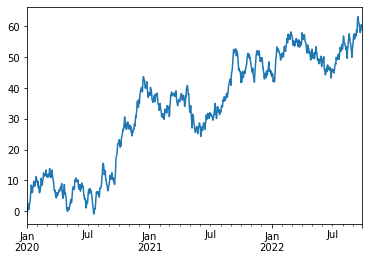

In [64]:
ts = ts.cumsum()
ts.plot()

In [65]:
# plot方法可以快速绘制所有带标签的列
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
    

In [66]:
from matplotlib import  pyplot as plt 
df_c = df.cumsum()


<Figure size 432x288 with 0 Axes>

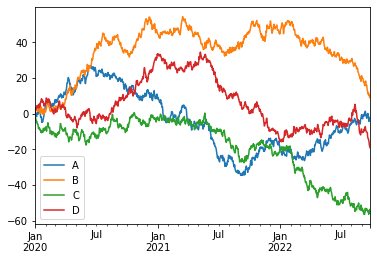

In [67]:
plt.figure()
df_c.plot()

No handles with labels found to put in legend.


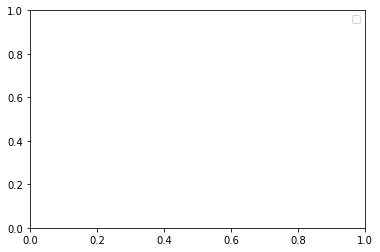

In [68]:
plt.legend(loc='best')

### 1.9数据的输入与输出

In [69]:
df.to_csv('foo.csv')

In [70]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2020-01-01,-0.403411,2.272258,-2.139303,0.603668
1,2020-01-02,0.908502,0.334168,-0.372602,2.604508
2,2020-01-03,-1.333236,-0.370015,-0.731589,-0.804730
3,2020-01-04,0.136966,1.180365,-0.634784,0.579586
4,2020-01-05,-1.064075,0.046090,-0.712340,0.745911
...,...,...,...,...,...
995,2022-09-22,-2.606518,-0.052643,-1.758823,-0.997720
996,2022-09-23,-0.934883,-1.304714,0.705741,-0.700098
997,2022-09-24,1.116805,0.373154,0.017944,-1.807158
998,2022-09-25,1.011512,-1.620245,1.952763,-0.682383


#### 此外pandas还支持读写HDF5、Excle

1
